In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
path = './data/'

In [13]:
df_rain = pd.read_json(path + 'all_rainfall_data.json')

In [14]:
df_rain

,num,typhoon_name,typhoon_cht_name,stno,stntype,accu_end_time,accu_value,statistic_count
0,195813,1958GRACE,葛瑞絲,460010,CWA,1958-09-04 20:00:00,103.2,85
1,195807,1958WINNIE,溫妮,460010,CWA,1958-07-17 08:00:00,144.8,85
2,195917,1959BABS,巴布絲,460010,CWA,1959-10-09 20:00:00,59.7,49
3,195905,1959BILLIE,畢莉,460010,CWA,1959-07-16 14:00:00,102.6,91
4,195921,1959FREDA,芙瑞達,460010,CWA,1959-11-19 20:00:00,302.6,61
...,...,...,...,...,...,...,...,...
6340,200119,2001LEKIMA,利奇馬,467411,CWA,2001-09-28 08:00:00,33.3,109
6341,200116,2001NARI,納莉,467411,CWA,2001-09-19 23:00:00,244.5,154
6342,200108,2001TORAJI,桃芝,467411,CWA,2001-07-31 14:00:00,24.6,82
6343,200105,2001TRAMI,潭美,467411,CWA,2001-07-11 20:00:00,15.0,37


In [26]:
df_price = pd.read_csv(path + '蕹菜小葉_台北一日交易行情.csv')

In [27]:
df_price.rename(columns = {'日期':'date', '平均價':'avg_price','交易量(公斤)':'trading_volume'},inplace = True)
df_price

,date,上價,中價,下價,avg_price,增減%,trading_volume,增減%.1
0,085/01/01,18.0,13.0,8.0,13.2,-,"1,645",-
1,085/01/02,14.4,13.0,12.6,12.7,-4,"2,400",46
2,085/01/03,13.9,11.8,10.0,11.8,-7,"2,835",18
3,085/01/05,17.0,12.0,7.0,13.3,-,"1,955",-
4,085/01/06,17.0,12.0,7.0,13.5,2,"3,213",64
...,...,...,...,...,...,...,...,...
8757,114/01/07,75.5,62.5,39.8,60.6,-8,"4,127",11
8758,114/01/08,85.0,54.6,28.2,55.4,-9,"4,141",0
8759,114/01/09,80.0,61.9,35.4,60.2,9,"2,671",-35
8760,114/01/10,74.2,51.2,28.2,51.2,-15,"3,602",35


In [28]:
import xml.etree.ElementTree as ET
import pandas as pd

# 讀取 XML 檔案
big_data = []
for year in range(2016, 2025):
    tree = ET.parse(path + f'/過去九年降雨資料/dy_Report_{year}.xml')
    root = tree.getroot()

    # 定義命名空間 (若有使用命名空間需指定)
    namespace = {'ns': 'urn:cwa:gov:tw:cwacommon:0.1'}

    # 找到所有測站
    stations = root.findall('.//ns:location', namespace)

    # 建立資料清單
    data = []
    for station in stations:
        # 測站相關資訊
        station_id = station.find('.//ns:StationID', namespace).text
        station_name = station.find('.//ns:StationName', namespace).text
        station_name_en = station.find('.//ns:StationNameEN', namespace).text
        station_attribute = station.find('.//ns:StationAttribute', namespace).text

        # 取出該測站的所有觀測時間資料
        obs_times = station.findall('.//ns:stationObsTime', namespace)
        for obs_time in obs_times:
            date = obs_time.find('ns:Date', namespace).text
            weather_elements = obs_time.find('.//ns:weatherElements', namespace)
            
            # 收集所有氣象要素（降水量等）
            weather_data = {}
            if weather_elements is not None:
                for element in weather_elements:
                    tag = element.tag.split('}')[-1]  # 去除命名空間
                    weather_data[tag] = element.text
            
            # 加入一筆完整的資料
            data.append({
                'StationID': station_id,
                'StationName': station_name,
                'StationNameEN': station_name_en,
                'StationAttribute': station_attribute,
                'Date': date,
                **weather_data
            })
        
    big_data.extend(data)


# 轉換為 DataFrame
df_rain = pd.DataFrame(big_data)
df_rain['Precipitation'] = df_rain['Precipitation'].replace({'T': '0.1', 'X':0}).astype(float)
df_rain


,StationID,StationName,StationNameEN,StationAttribute,Date,Precipitation
0,466880,板橋,BANQIAO,署屬有人氣象站,2016-01-01,0.0
1,466880,板橋,BANQIAO,署屬有人氣象站,2016-01-02,0.1
2,466880,板橋,BANQIAO,署屬有人氣象站,2016-01-03,15.5
3,466880,板橋,BANQIAO,署屬有人氣象站,2016-01-04,0.5
4,466880,板橋,BANQIAO,署屬有人氣象站,2016-01-05,0.5
...,...,...,...,...,...,...
113979,C1E770,苗栗,MIAOLI,署屬自動氣象站,2024-12-27,0.0
113980,C1E770,苗栗,MIAOLI,署屬自動氣象站,2024-12-28,0.0
113981,C1E770,苗栗,MIAOLI,署屬自動氣象站,2024-12-29,0.0
113982,C1E770,苗栗,MIAOLI,署屬自動氣象站,2024-12-30,0.0


### 純每日紀錄

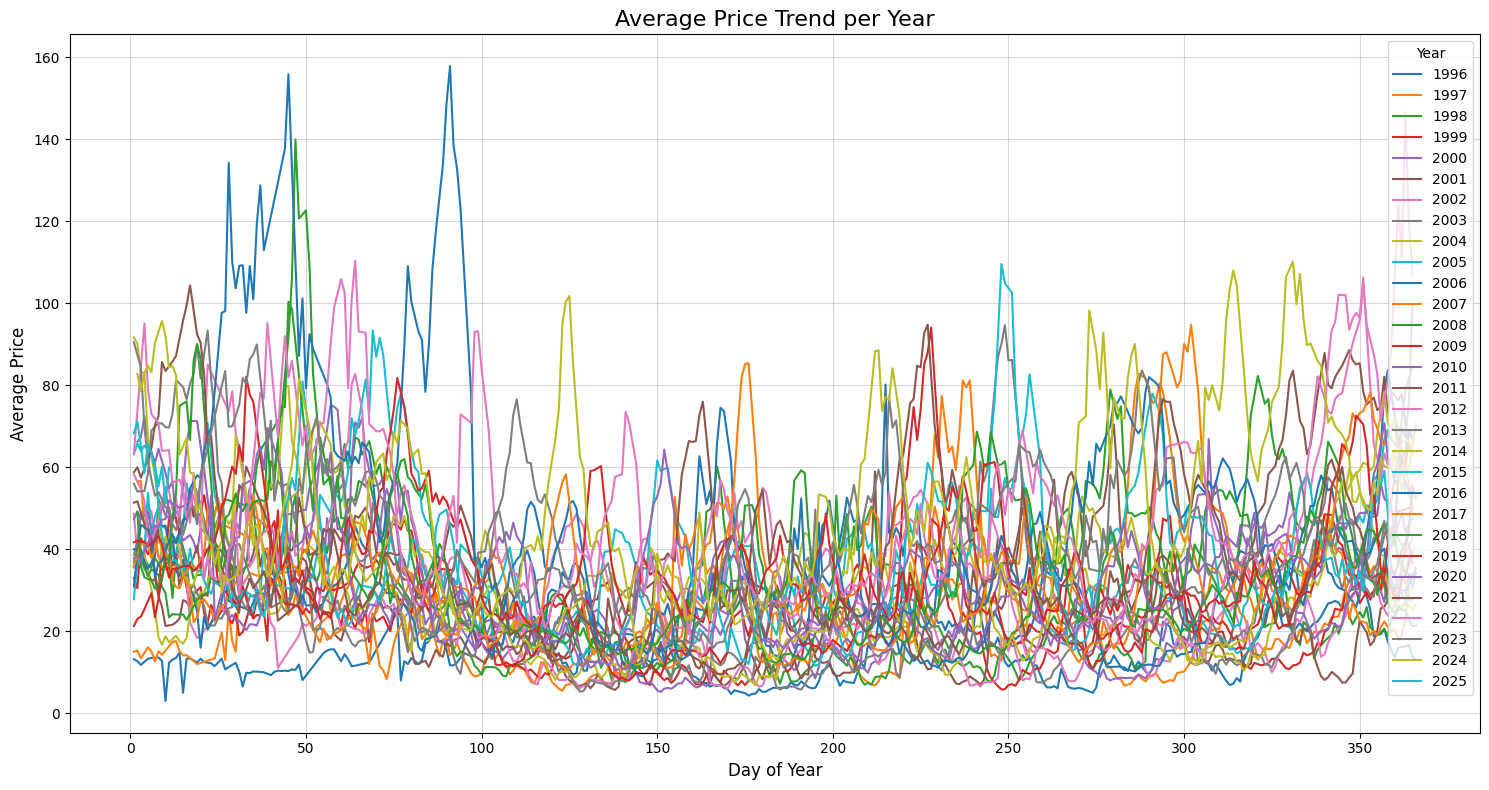

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設你的 DataFrame 名為 df_price
# 處理民國年，將其轉換為西元年
def convert_to_ad_date(date_str):
    if isinstance(date_str, str):  # 確保是字串才進行處理
        year, month, day = map(int, date_str.split('/'))
        year += 1911  # 將民國年轉為西元年
        return f"{year}-{month:02d}-{day:02d}"
    return date_str  # 如果已經是 Timestamp，直接返回

df_price['date'] = df_price['date'].apply(convert_to_ad_date)
df_price['date'] = pd.to_datetime(df_price['date'], format='%Y-%m-%d', errors='coerce')

# 新增年份和一年中的天數屬性
df_price['year'] = df_price['date'].dt.year
df_price['day_of_year'] = df_price['date'].dt.dayofyear

# 繪製折線圖
plt.figure(figsize=(15, 8))

for year, group in df_price.groupby('year'):
    # 將日期排序，避免日期順序不正確
    group = group.sort_values(by='date')
    plt.plot(group['day_of_year'], group['avg_price'], label=str(year))

plt.title('Average Price Trend per Year', fontsize=16)
plt.xlabel('Day of Year', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.legend(title='Year')
plt.grid(alpha=0.5)

# 顯示圖表
plt.tight_layout()
plt.show()




### 一個資料為7天平均

C:\Users\meowm\AppData\Local\Temp\ipykernel_11604\802901400.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekly_avg['year'] = df_weekly_avg['date'].dt.year
C:\Users\meowm\AppData\Local\Temp\ipykernel_11604\802901400.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekly_avg['week_of_year'] = df_weekly_avg['date'].dt.isocalendar().week


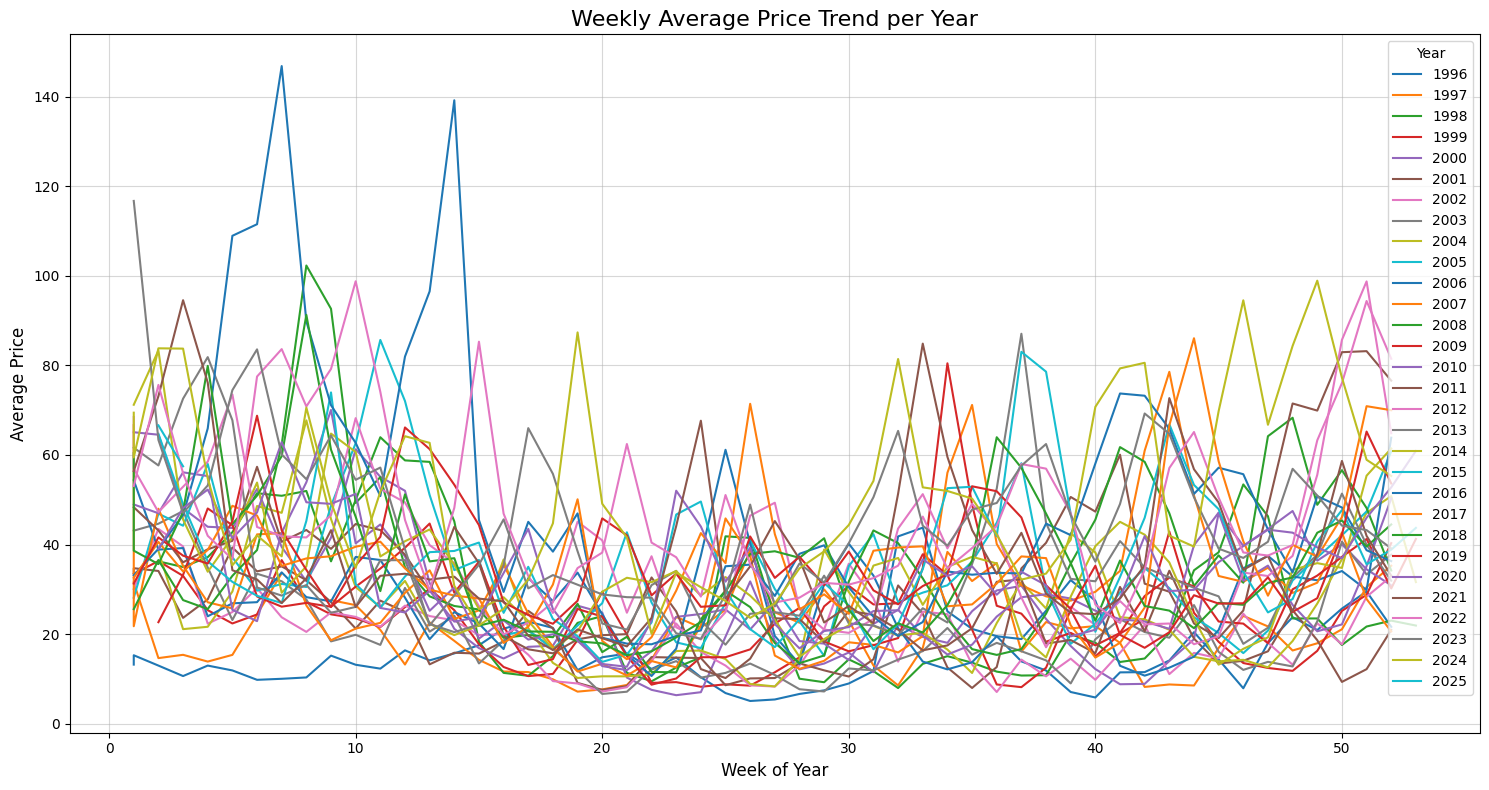

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設你的 DataFrame 名為 df_price
# 處理民國年，將其轉換為西元年
def convert_to_ad_date(date_str):
    if isinstance(date_str, str):  # 確保是字串才進行處理
        year, month, day = map(int, date_str.split('/'))
        year += 1911  # 將民國年轉為西元年
        return f"{year}-{month:02d}-{day:02d}"
    return date_str  # 如果已經是 Timestamp，直接返回

df_price['date'] = df_price['date'].apply(convert_to_ad_date)
df_price['date'] = pd.to_datetime(df_price['date'], format='%Y-%m-%d', errors='coerce')

# 選擇數值型欄位進行聚合
numeric_columns = df_price.select_dtypes(include=['number']).columns
weekly_avg = df_price.resample('W-Mon', on='date')[numeric_columns].mean().reset_index()

# 將周平均存入新的 DataFrame
df_weekly_avg = weekly_avg[['date', 'avg_price']]
df_weekly_avg['year'] = df_weekly_avg['date'].dt.year
df_weekly_avg['week_of_year'] = df_weekly_avg['date'].dt.isocalendar().week

# 繪製折線圖
plt.figure(figsize=(15, 8))

for year, group in df_weekly_avg.groupby('year'):
    # 將周數排序，避免順序不正確
    group = group.sort_values(by='week_of_year')
    plt.plot(group['week_of_year'], group['avg_price'], label=str(year))

plt.title('Weekly Average Price Trend per Year', fontsize=16)
plt.xlabel('Week of Year', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.legend(title='Year')
plt.grid(alpha=0.5)

# 顯示圖表
plt.tight_layout()
plt.show()


In [20]:
df_price

,date,market,產品,上價,中價,下價,avg_price,增減%,trading_volume,增減%.1,year,day_of_year
0,1996-01-01,109 台北一,LA1 甘藍 初秋,12.0,9.0,6.0,8.8,-,"75,779",-,1996,1
1,1996-01-02,109 台北一,LA1 甘藍 初秋,13.0,10.0,7.0,11.2,27,"58,780",-22,1996,2
2,1996-01-03,109 台北一,LA1 甘藍 初秋,13.0,10.0,7.0,10.1,-10,"103,999",77,1996,3
3,1996-01-05,109 台北一,LA1 甘藍 初秋,11.0,9.0,7.0,8.1,-,"108,342",-,1996,5
4,1996-01-06,109 台北一,LA1 甘藍 初秋,10.0,8.0,6.0,7.9,-2,"113,928",5,1996,6
...,...,...,...,...,...,...,...,...,...,...,...,...
8781,2025-01-07,109 台北一,LA1 甘藍 初秋,20.6,17.4,15.3,17.6,-2,"177,076",30,2025,7
8782,2025-01-08,109 台北一,LA1 甘藍 初秋,18.8,17.8,14.2,17.3,-2,"151,774",-14,2025,8
8783,2025-01-09,109 台北一,LA1 甘藍 初秋,16.2,14.2,11.3,14.0,-19,"163,168",8,2025,9
8784,2025-01-10,109 台北一,LA1 甘藍 初秋,17.3,16.0,14.2,15.9,14,"129,015",-21,2025,10


In [21]:
df_weekly_avg

,date,avg_price,year,week_of_year
0,1996-01-01,8.800000,1996,1
1,1996-01-08,9.260000,1996,2
2,1996-01-15,5.783333,1996,3
3,1996-01-22,4.540000,1996,4
4,1996-01-29,3.866667,1996,5
...,...,...,...,...
1511,2024-12-16,39.583333,2024,51
1512,2024-12-23,32.616667,2024,52
1513,2024-12-30,25.100000,2024,1
1514,2025-01-06,15.166667,2025,2


### 用股市的7日線算法

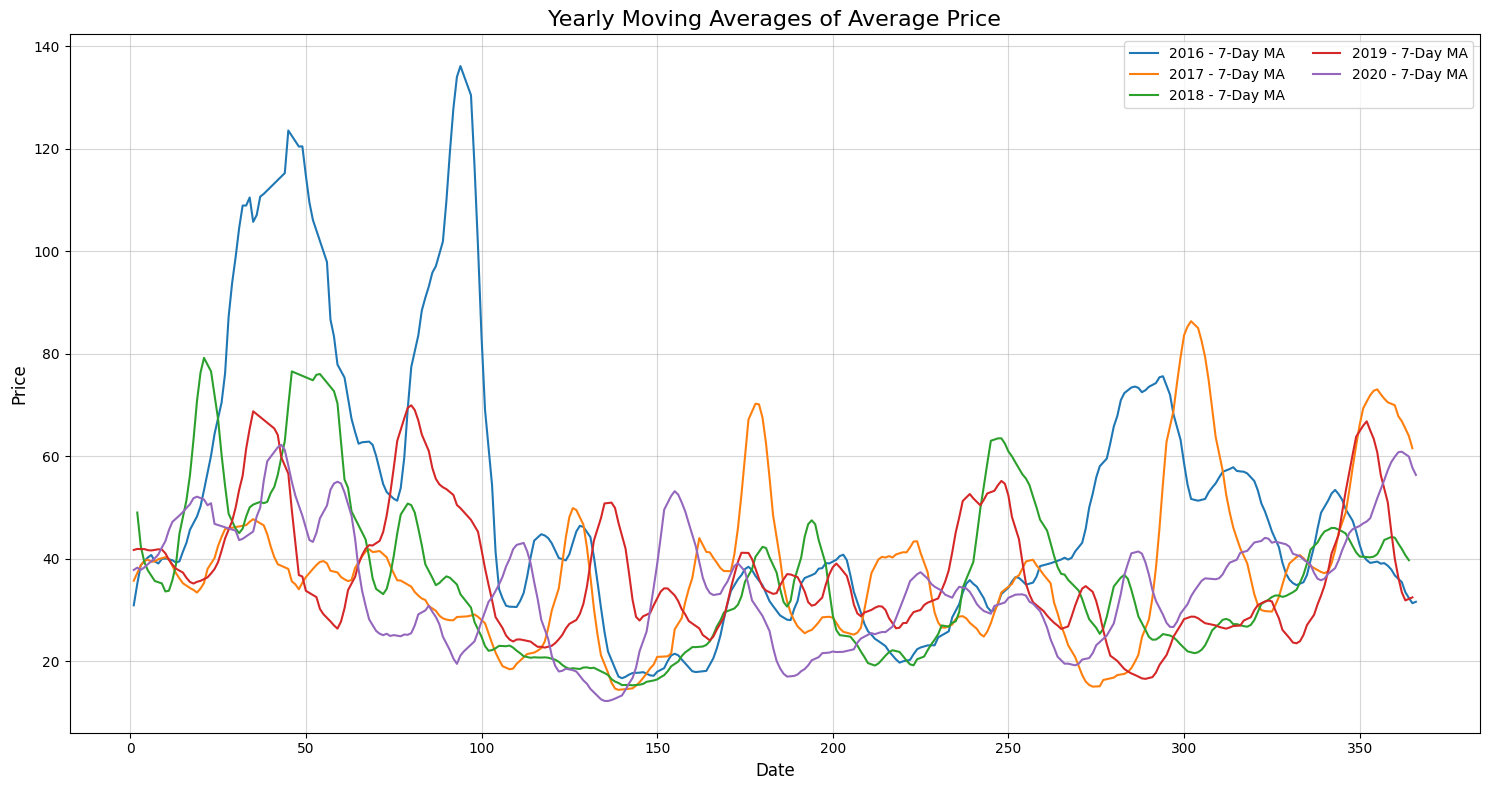

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
# 假設你的 DataFrame 名為 df_price
# 處理民國年，將其轉換為西元年
def convert_to_ad_date(date_str):
    if isinstance(date_str, str):  # 確保是字串才進行處理
        year, month, day = map(int, date_str.split('/'))
        year += 1911  # 將民國年轉為西元年
        return f"{year}-{month:02d}-{day:02d}"
    return date_str  # 如果已經是 Timestamp，直接返回

df_price['date'] = df_price['date'].apply(convert_to_ad_date)
df_price['date'] = pd.to_datetime(df_price['date'], format='%Y-%m-%d', errors='coerce')

# 計算移動平均 (股市均線風格)
def calculate_moving_average(df, column, window):
    df[f'{column}_ma{window}'] = df[column].rolling(window=window, min_periods=1).mean()
    return df

# 按年計算 5 日、10 日、20 日均線
df_price = df_price.sort_values(by='date')  # 確保日期排序正確
df_price['year'] = df_price['date'].dt.year

ma_dfs = []
for year, group in df_price.groupby('year'):
    group = calculate_moving_average(group, 'avg_price', 7)
    # group = calculate_moving_average(group, 'avg_price', 10)
    # group = calculate_moving_average(group, 'avg_price', 20)
    ma_dfs.append(group)

df_ma = pd.concat(ma_dfs)

# 繪製均線圖
plt.figure(figsize=(15, 8))
for year, group in df_ma.groupby('year'):
    # plt.plot(group['date'], group['avg_price'], label=f'{year} - Avg Price', alpha=0.5)
    if 2016 <= year <= 2020:
        plt.plot(group['day_of_year'], group['avg_price_ma7'], label=f'{year} - 7-Day MA')
    # plt.plot(group['date'], group['avg_price_ma10'], label=f'{year} - 10-Day MA')
    # plt.plot(group['date'], group['avg_price_ma20'], label=f'{year} - 20-Day MA')

plt.title('Yearly Moving Averages of Average Price', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(ncol=2, fontsize=10)
plt.grid(alpha=0.5)

# 顯示圖表
plt.tight_layout()
plt.show()


In [32]:
df_ma

,date,上價,中價,下價,avg_price,增減%,trading_volume,增減%.1,year,day_of_year,avg_price_ma7
0,1996-01-01,18.0,13.0,8.0,13.2,-,"1,645",-,1996,1,13.200000
1,1996-01-02,14.4,13.0,12.6,12.7,-4,"2,400",46,1996,2,12.950000
2,1996-01-03,13.9,11.8,10.0,11.8,-7,"2,835",18,1996,3,12.566667
3,1996-01-05,17.0,12.0,7.0,13.3,-,"1,955",-,1996,5,12.750000
4,1996-01-06,17.0,12.0,7.0,13.5,2,"3,213",64,1996,6,12.900000
...,...,...,...,...,...,...,...,...,...,...,...
8757,2025-01-07,75.5,62.5,39.8,60.6,-8,"4,127",11,2025,7,64.933333
8758,2025-01-08,85.0,54.6,28.2,55.4,-9,"4,141",0,2025,8,63.571429
8759,2025-01-09,80.0,61.9,35.4,60.2,9,"2,671",-35,2025,9,62.414286
8760,2025-01-10,74.2,51.2,28.2,51.2,-15,"3,602",35,2025,10,59.557143


### 五年五年平均(從ma那張調的)，但有點異常值得樣子

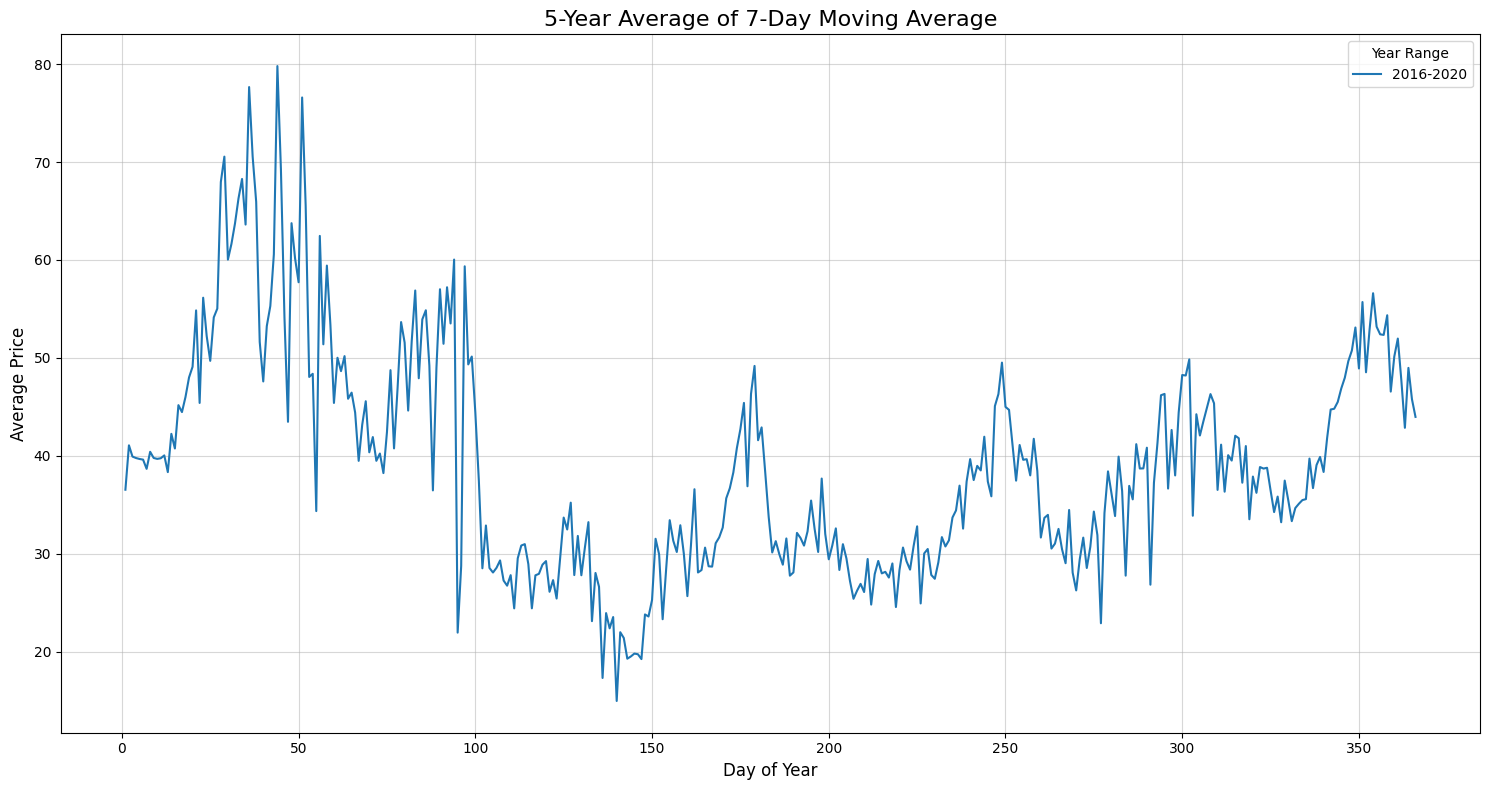

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設你的 DataFrame 名為 df_price
# 已包含移動平均線的計算邏輯（7日線）

def calculate_five_year_average(df, column, start_year, end_year):
    # 篩選指定年份範圍內的資料
    filtered_df = df[(df['year'] >= start_year) & (df['year'] <= end_year)]
    # 按 day_of_year 計算該範圍內的平均值
    return filtered_df.groupby('day_of_year')[column].mean()

# 確保日期排序正確
df_ma = df_ma.sort_values(by='date')
df_ma['day_of_year'] = df_ma['date'].dt.dayofyear

# 計算 1996-2000、2001-2005 等分段的平均
five_year_ranges = [(1996, 2000), (2001, 2005), (2006, 2010), (2011, 2015), (2016, 2020),(2021, 2024)]
averages = {}

for start_year, end_year in five_year_ranges:
    averages[f'{start_year}-{end_year}'] = calculate_five_year_average(
        df_ma, 'avg_price_ma7', start_year, end_year
    )

# 繪製折線圖
plt.figure(figsize=(15, 8))
for label, data in averages.items():
    if label == '2016-2020':
        plt.plot(data.index, data.values, label=label)

plt.title('5-Year Average of 7-Day Moving Average', fontsize=16)
plt.xlabel('Day of Year', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.legend(title='Year Range')
plt.grid(alpha=0.5)

# 顯示圖表
plt.tight_layout()
plt.show()

### 類似上一張表，但變成14天smooth，我不知道算幾日線
意外地畫出物價漲幅

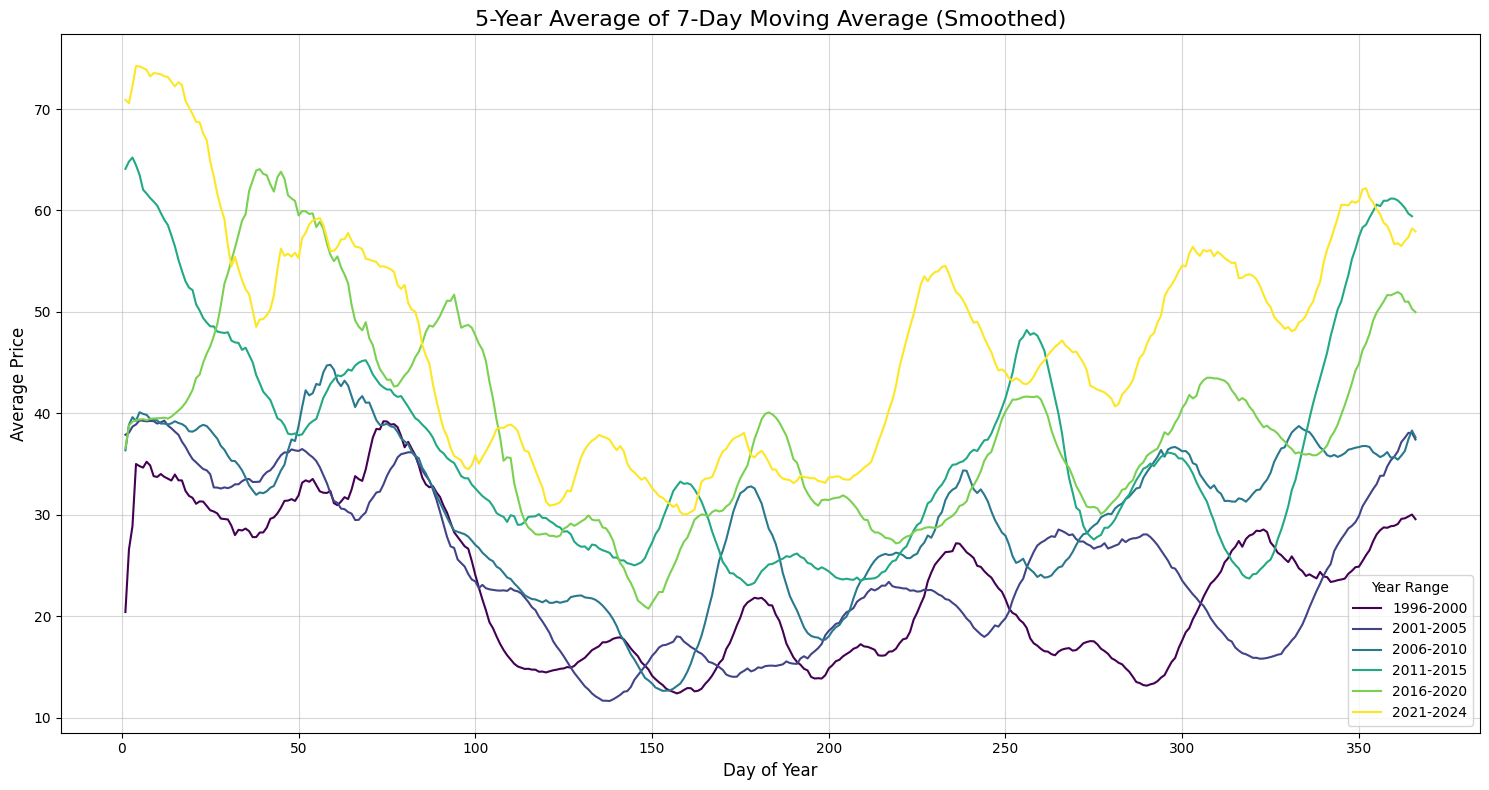

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 假設你的 DataFrame 名為 df_price
# 已包含移動平均線的計算邏輯（7日線）

def calculate_five_year_average(df, column, start_year, end_year):
    # 篩選指定年份範圍內的資料
    filtered_df = df[(df['year'] >= start_year) & (df['year'] <= end_year)]
    # 按 day_of_year 計算該範圍內的平均值
    return filtered_df.groupby('day_of_year')[column].mean()

def smooth_series(series, window):
    return series.rolling(window=window, min_periods=1).mean()

# 確保日期排序正確
df_ma = df_ma.sort_values(by='date')
df_ma['day_of_year'] = df_ma['date'].dt.dayofyear

# 計算 1996-2000、2001-2005 等分段的平均
five_year_ranges = [(1996, 2000), (2001, 2005), (2006, 2010), (2011, 2015), (2016, 2020), (2021, 2024)]
averages = {}

for start_year, end_year in five_year_ranges:
    averages[f'{start_year}-{end_year}'] = calculate_five_year_average(
        df_ma, 'avg_price_ma7', start_year, end_year
    )

# 對每條曲線進行檢查和平滑處理
smoothed_averages = {
    label: smooth_series(data, window=14)  # 加長平滑窗口進一步減少波動
    for label, data in averages.items()
}

# 繪製折線圖
plt.figure(figsize=(15, 8))
colors = cm.viridis(np.linspace(0, 1, len(smoothed_averages)))  # 使用漸變色表
for (label, data), color in zip(smoothed_averages.items(), colors):
    plt.plot(data.index, data.values, label=label, color=color)

plt.title('5-Year Average of 7-Day Moving Average (Smoothed)', fontsize=16)
plt.xlabel('Day of Year', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.legend(title='Year Range')
plt.grid(alpha=0.5)

# 顯示圖表
plt.tight_layout()
plt.show()


In [40]:
pd.set_option('display.max_rows', 500)  # 將最大行數設為 500


In [41]:
print(averages["1996-2000"])

day_of_year
1       7.866667
2       8.050000
3       7.846667
4       6.216667
5       7.450000
6       7.232000
7       6.629167
8       7.677976
9       6.878571
10      6.665714
11      6.650000
12      5.996429
13      6.005714
14      5.751429
15      5.557143
16      5.403571
17      5.188571
18      5.166667
19      4.921429
20      4.685714
21      4.545714
22      4.450000
23      4.121429
24      4.202857
25      4.439286
26      4.578571
27      4.482857
28      4.100000
29      4.142857
30      4.125000
31      4.160714
32      4.217857
33      5.032143
34      4.842857
35      4.822857
36      4.966667
37      3.752381
38      4.890476
39      6.042857
40      5.480952
41      5.632143
42      5.982143
43      4.128571
44      4.089286
45      5.950000
46      5.928571
47      7.185714
48      6.153571
49      6.057143
50      7.100000
51      8.007143
52      3.528571
53      7.900000
54      8.276190
55      6.620000
56      7.992857
57      7.534286
58      7.874286
59

In [44]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# 假設 df_price 和 df_ma 已包含所需數據
# 在這裡，確保 day_of_year、year 等欄位已正確計算

# 計算 5 年區間平均
def calculate_five_year_average(df, column, start_year, end_year):
    filtered_df = df[(df['year'] >= start_year) & (df['year'] <= end_year)]
    return filtered_df.groupby('day_of_year')[column].mean()

# 平滑處理
def smooth_series(series, window):
    return series.rolling(window=window, min_periods=1).mean()

# 計算五年區間平均及平滑數據
five_year_ranges = [(1996, 2000), (2001, 2005), (2006, 2010), (2011, 2015), (2016, 2020),(2021, 2024)]
averages = {
    f'{start}-{end}': calculate_five_year_average(df_ma, 'avg_price_ma7', start, end)
    for start, end in five_year_ranges
}
smoothed_averages = {label: smooth_series(data, window=14) for label, data in averages.items()}

# 創建 Plotly 圖表
fig = go.Figure()

# 添加各年份的 7 日均線
for year, group in df_ma.groupby('year'):
    # if 2016 <= year <= 2020:  # 限制年份範圍
    fig.add_trace(
        go.Scatter(
            x=group['day_of_year'],
            y=group['avg_price_ma7'],
            mode='lines',
            name=f'{year} - 7-Day MA',
            line=dict(width=1.5, dash='solid')
        )
    )

# 添加每 5 年的平滑均線
for label, data in smoothed_averages.items():
    fig.add_trace(
        go.Scatter(
            x=data.index,
            y=data.values,
            mode='lines',
            name=f'{label} (Smoothed)',
            line=dict(width=2, dash='dash')
        )
    )

# 更新圖表佈局
fig.update_layout(
    title='Yearly and 5-Year Smoothed Averages of 7-Day Moving Average',
    xaxis_title='Day of Year',
    yaxis_title='Average Price',
    legend_title='Legend',
    template='plotly_white',
    width=1200,  # 調整圖表寬度（以像素為單位）
    height=700,  # 調整圖表高度（以像素為單位）
    xaxis=dict(
        showgrid=True,  # 開啟 X 軸格線
        gridcolor='lightgray',  # 格線顏色
        gridwidth=0.5  # 格線寬度
    ),
    yaxis=dict(
        showgrid=True,  # 開啟 Y 軸格線
        gridcolor='lightgray',  # 格線顏色
        gridwidth=0.5  # 格線寬度
    )
)

# 顯示圖表
fig.show()
